# S3 statistics analysis code
The notebook here analysis the results produced by the batch run code `s3-run.sh`. This is in contrast with the notebook `s3longitudinal.ipynb`, which is used during the code development phase.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8.0, 6.0]
plt.rcParams['figure.dpi'] = 100

## Main results

Below plots the compensated S3 against wavenumber. The energy injection rate is estimated using the peak of the compensated S3.

In [35]:
read_csv = lambda path: pd.read_csv(path,header=None,comment='#',names=['r','S3'])

In [36]:
s3_normal = read_csv('./s3long-out/s3-normal-multiproc-bash-sampling-1000000-50-pts.txt')
s3_kdrive = read_csv('./s3long-out/s3-kdrive38-multiproc-bash-sampling-1000000-50-pts.txt')
s3_ts001  = read_csv('./s3long-out/s3-ts001-multiproc-bash-sampling-1000000-50-pts.txt')
s3_dedt54 = read_csv('./s3long-out/s3-dedt5e4-multiproc-bash-sampling-1000000-50-pts.txt')

In [80]:
# The maximum point of the compensated curve
eps_normal = np.max((-5/4)*s3_normal['S3']/s3_normal['r'])
eps_kdrive = np.max((-5/4)*s3_kdrive['S3']/s3_kdrive['r'])
eps_ts001  = np.max((-5/4)*s3_ts001['S3']/s3_ts001['r'])
eps_dedt54 = np.max((-5/4)*s3_dedt54['S3']/s3_dedt54['r'])

In [81]:
print('eps_normal =',eps_normal)
print('eps_kdrive =',eps_kdrive)
print('eps_ts001 =',eps_ts001)
print('eps_dedt54 =',eps_dedt54)

eps_normal = 0.0038434395354028494
eps_kdrive = 0.0020179974159655217
eps_ts001 = 0.003507739236141457
eps_dedt54 = 0.0002633913230496568


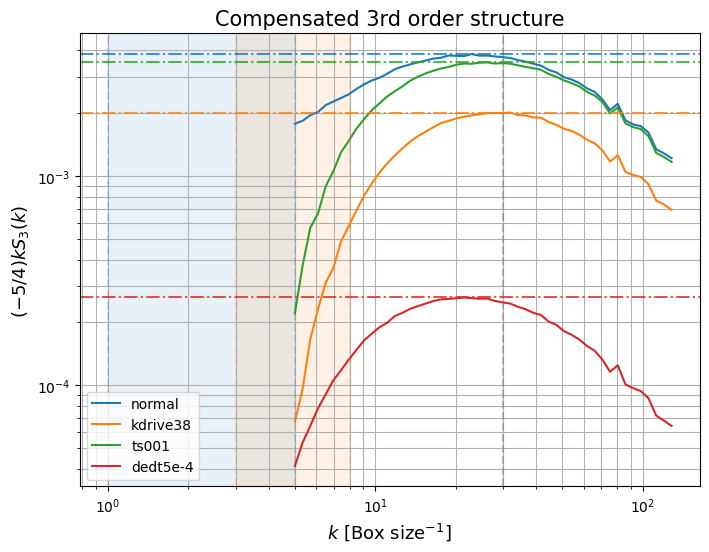

In [83]:
plt.plot(1/s3_normal['r'],(-5/4)*s3_normal['S3']/s3_normal['r'],label='normal')
plt.plot(1/s3_kdrive['r'],(-5/4)*s3_kdrive['S3']/s3_kdrive['r'],label='kdrive38')
plt.plot(1/s3_ts001['r'],(-5/4)*s3_ts001['S3']/s3_ts001['r'],label='ts001')
plt.plot(1/s3_dedt54['r'],(-5/4)*s3_dedt54['S3']/s3_dedt54['r'],label='dedt5e-4')
plt.xlabel('$k$ [Box size$ ^{-1}$]',fontsize=13)
plt.ylabel('$(-5/4)k S_3(k)$',fontsize=13)
plt.title('Compensated 3rd order structure',fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.legend()

# Where inertial range ends from the power spectrum plot (roughly)
plt.axvline(30,color='grey',ls='--',alpha=0.5)

# Driving wavenumbers 
plt.axvline(1,color='tab:blue',ls='--',alpha=0.2)
plt.axvline(5,color='tab:blue',ls='--',alpha=0.2)
plt.axvline(3,color='tab:orange',ls='--',alpha=0.2)
plt.axvline(8,color='tab:orange',ls='--',alpha=0.2)
yl,yh = plt.gca().get_ylim()
plt.ylim(yl,yh)
x15 = np.linspace(1,5)
x38 = np.linspace(3,8)
plt.fill_between(x15,yl,yh,color='tab:blue',alpha=0.1)
plt.fill_between(x38,yl,yh,color='tab:orange',alpha=0.1)
plt.grid(which='major')
plt.grid(which='minor')

# The maximum lines 
plt.axhline(eps_normal,color='tab:blue',ls='-.',alpha=0.8)
plt.axhline(eps_kdrive,color='tab:orange',ls='-.',alpha=0.8)
plt.axhline(eps_ts001,color='tab:green',ls='-.',alpha=0.8)
plt.axhline(eps_dedt54,color='tab:red',ls='-.',alpha=0.8)

## Convergency test